In [1]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import time

### Optimizer1D

### 1. Stopping criterion:  

  Based on **Interval size & Function reduction**

  **a. Interval Size**  
  $$|x_1-x_3|\leq \epsilon_R|x_2| + \epsilon_{abs}$$  
  
  Interval size <= Absolute Tolerance + Realtive Precision  

  Absolute part:  
  $\epsilon_{abs}$ Tolerance is an absolute value based on anticipated interval size $\epsilon_x = 10^{-6}$.
    
  Relative part:  
  $\epsilon_R$ can be safely chosen to be $\epsilon_R = 10^{-7}$ based on machine precision:  
    As suppose we have 64 bit PC, $\epsilon_m=10^{-16}$, $\epsilon_R$ is less than $\sqrt{\epsilon_m}= 10^{-8}$
  
  **b. Function Reduction**  
  $$|\bar{f}_{new}-\bar{f}_{old}|\leq \epsilon_R|f_2| + \epsilon_{abs}$$    
  $$\bar{f} = \frac{f_1+f_2+f_3}{3}$$  
  Check every two consecutive iterations' value gap, stop when value gap is small enough to prevent log-like functions keep iterating.
  
  
  
  
### 2. Starting point  

  Randomly choosing starting point based on normal distribution around the desired optimum point, adjust the distribution by mean $\mu$ and variance $\sigma^2$.
  
  
### 3. Evaluation  
  
  **a. Estimated unbiased standard deviation (Bessel correction)**:  
    Given a set of samples, estimate the unbiased standard deviation:$$ bc = \sqrt{\sigma^2} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}}$$ 
  
  **b. Relative distance**: $$\frac{|x_{pred}|-|x_{real}|}{2}$$


**Params are chosen as**:     
  $\epsilon_R = 10^{-7}$  
  $\epsilon_{abs} = 10^{-6}$  
  $\mu = 0$  
  $\sigma = 5$  
  $step\_size = 0.01$  
  $sample\_nums = 100$  
  
  
  
**Functions**:  
  $f(x) = (x-10)^2$  
  Optimum: $x = 10.0, value = 0.0$
  
  $f(x) = |x-5|+ 1$  
  Optimum: $x = 5.0, value = 1.0$
  

## 1D Optimization

### Iteration Example

Iterations:28

x:9.835169798668954	value:0.02716899527083326


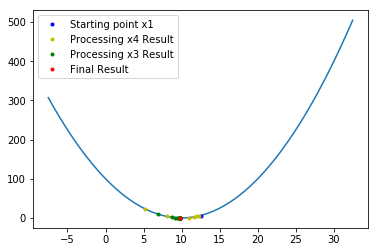

In [131]:
mu = 0
sigma = 5
f1 = lambda x: (x - 10) ** 2
x_opt1 = 10.0
value_opt1 = 0.0

xs = x_opt1 + np.random.normal(mu, sigma, 1)[0]
optimizer1D_with_plot(f1, xs, 0.01, 20)

### Evaluation

====== Evaluation ======

Evaluate 100 times:

x: 10.056227 +- 0.144044 
values: 2.057267 +- 0.392698 

relative distance of x: 0.028113 +- 0.072022 
relative distance of value: 1.028634 +- 0.196349 

runtime: 0.189319 +- 0.006125 ms


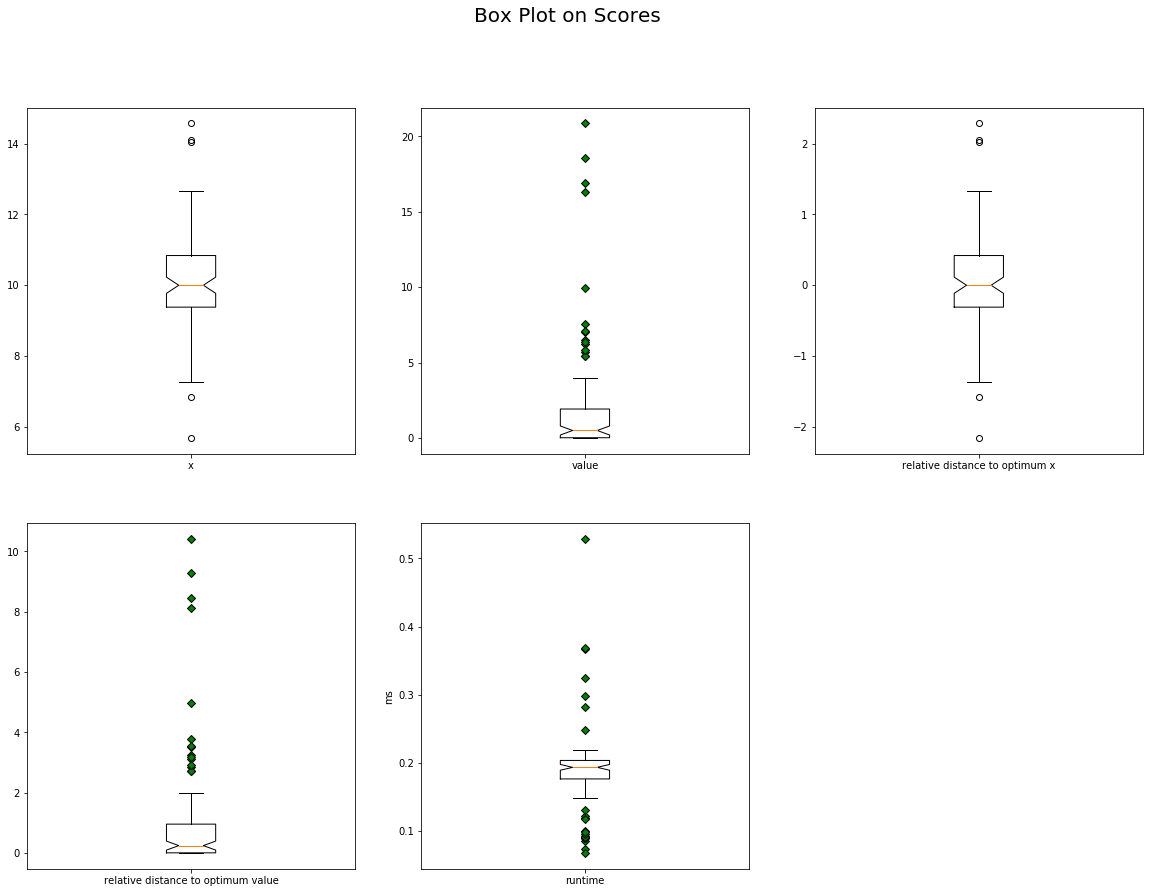

In [165]:
Evaluate_1D(f1, x_opt1, value_opt1)

Iterations:31

x:4.432362910452593	value:1.5676370895474072


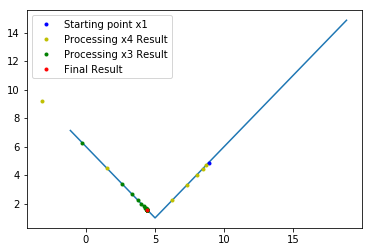

In [13]:
mu = 0
sigma = 5
f2 = lambda x: abs(x-5)+1
x_opt2 = 5.0
value_opt2 = 1.0

xs = x_opt2 + np.random.normal(mu, sigma, 1)[0]
optimizer1D_with_plot(f2, xs, 0.01)

====== Evaluation ======

Evaluate 100 times:

x: 5.059149 +- 0.147251 
values: 1.943531 +- 0.112808 

relative distance of x: 0.029575 +- 0.073625 
relative distance of value: 0.471765 +- 0.056404 

runtime: 0.215976 +- 0.004998 ms


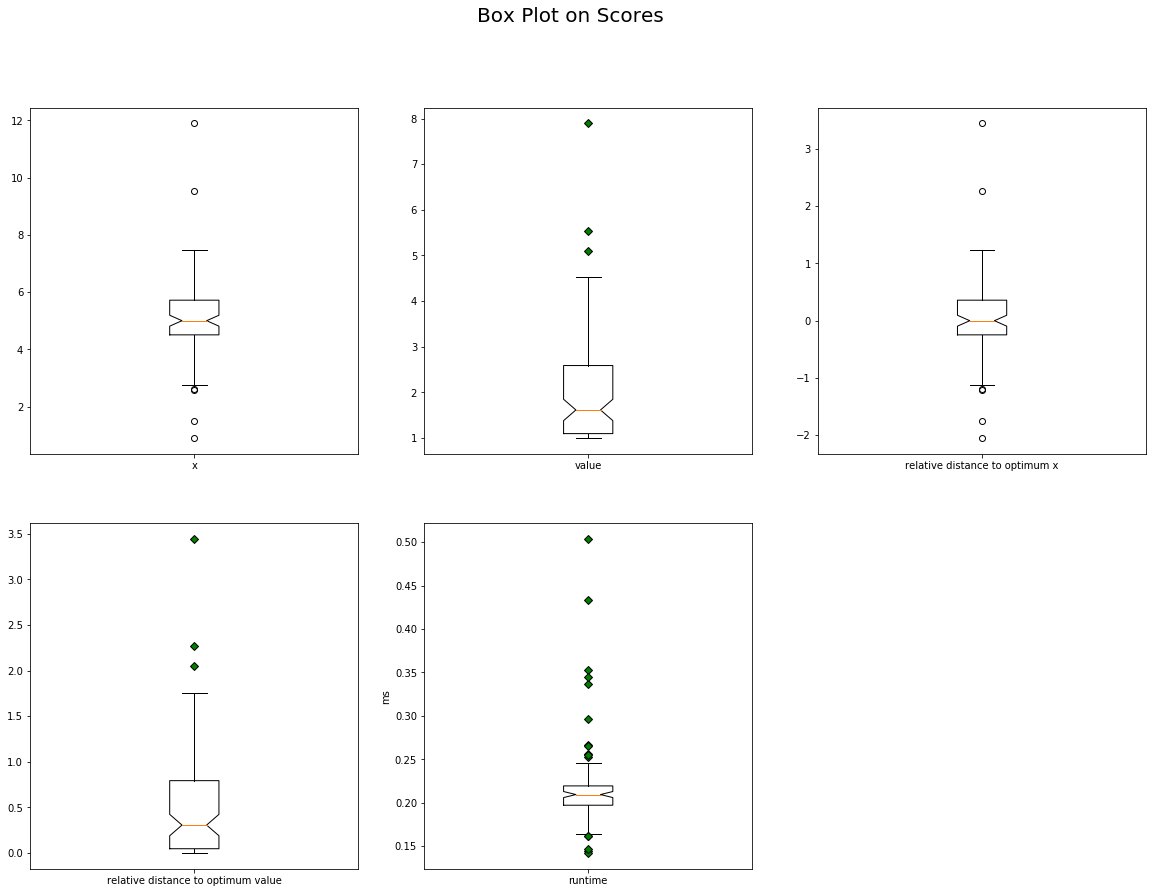

In [164]:
Evaluate_1D(f2, x_opt2, value_opt2)

| Functions&nbsp; &nbsp;| Eval times | runtime                    | x                    | value                | relative_x            | relative_value       |
|---------------------|------------|----------------------------|----------------------|----------------------|-----------------------|----------------------|
| $(x-10)^2$ | 100        | 0.1837 $\pm$ 0.0065 ms | 9.5293 $\pm$ 0.0491 | 0.4610 $\pm$ 0.0897 | -0.2353 $\pm$ 0.0245 | 0.2305 $\pm$ 0.0448 |
| $|x-5|+1$  | 100        | 0.1966 $\pm$ 0.0034 ms | 4.5045 $\pm$ 0.0488 | 1.5053 $\pm$ 0.0478 | -0.2477 $\pm$ 0.0244 | 0.2527 $\pm$ 0.0239 |

## Coordinate descent  

Optimize x direction first and then y.   
Keep on looping while not satisfying the function reduction condition.

**Params are chosen as**:     
  $\epsilon_R = 10^{-7}$  
  $\epsilon_{abs} = 10^{-6}$  
  $\mu = 0$  
  $\sigma = 5$  
  $step\_size = 0.01$  
  $sample\_nums = 100$  
  
  
  
**Functions**:  
  $f(x) = 3(x+1)^2 + 4(y-3)^2$  
  Optimum: $x = -1, y = 3, value = 0.0$
  
  $f(x) = |x-3| + |y+1| + 2$  
  Optimum: $x = 3, y = -1, value = 2.0$
  

====== Evaluation ======

Evaluate 100 times:

x: -0.999906666 +- 0.000028166 
y: 3.000043986 +- 0.000025864 
values: 0.000000534 +- 0.000000050 

relative distance of x: -0.000046667 +- 0.000014083 
relative distance of y: 0.000021993 +- 0.000012932 
relative distance of value: 0.000000267 +- 0.000000025 

runtime: 2.026410103 +- 0.083423347 ms


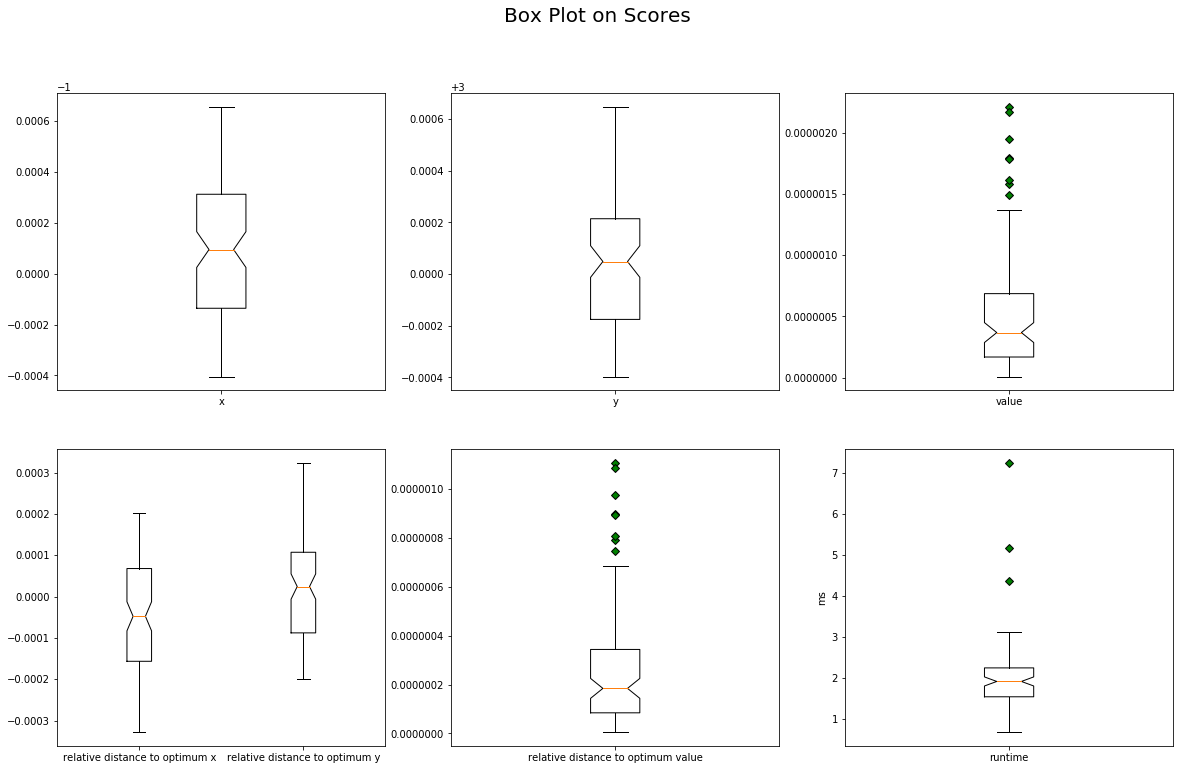

In [160]:
mu = 0
sigma = 2
step = 0.01

f3 = lambda x,y: 3*(x+1)**2 + 4*(y-3)**2
x_opt3 = -1.0
y_opt3 = 3.0
value_opt3 = 0.0

Evaluate_2D(f3, x_opt3, y_opt3, value_opt3)


====== Evaluation ======

Evaluate 100 times:

x: 3.000000128 +- 0.000000110 
y: -0.999999888 +- 0.000000105 
values: 2.000001687 +- 0.000000090 

relative distance of x: 0.000000064 +- 0.000000055 
relative distance of y: -0.000000056 +- 0.000000053 
relative distance of value: 0.000000844 +- 0.000000045 

runtime: 2.190129757 +- 0.078881942 ms


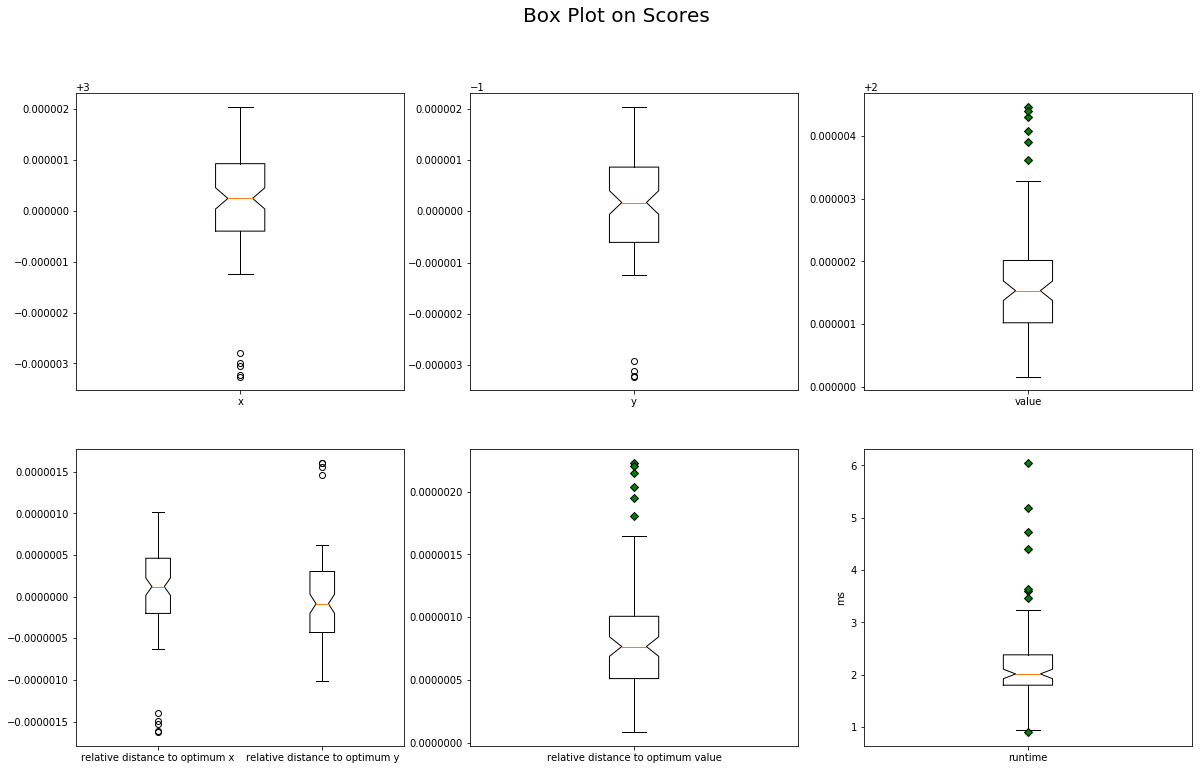

In [159]:
mu = 0
sigma = 2
step = 0.01

f4 = lambda x,y: abs(x-3) + abs(y+1) + 2
x_opt4 = 3.0
y_opt4 = -1.0
value_opt4 = 2.0

Evaluate_2D(f4, x_opt4, y_opt4, value_opt4)


### Different stopping criterion

Removed function reduction part in stopping criterion.

#### Quadratic

Iterations:10

x:10.000812614843227	value:6.603428834325346e-07


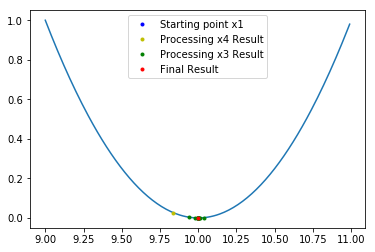

In [210]:
optimizer1D_with_plot(f1, x_opt1, 0.01)

Iterations:24

x:10.000000963215367	value:9.27783843268261e-13


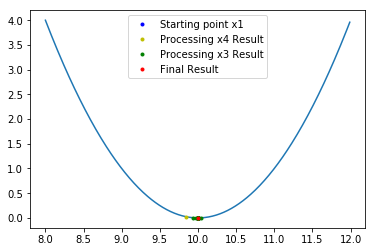

In [211]:
optimizer1D_2_with_plot(f1, x_opt1, 0.01)

#### Absolute

Iterations:22

x:5.0000025220079545	value:1.0000025220079545


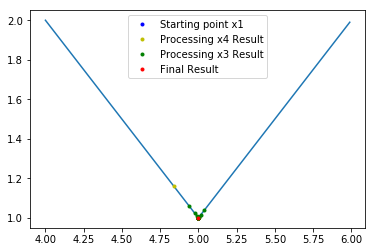

In [214]:
optimizer1D_with_plot(f2, x_opt2, 0.01)

Iterations:25

x:4.999999404732904	value:1.000000595267096


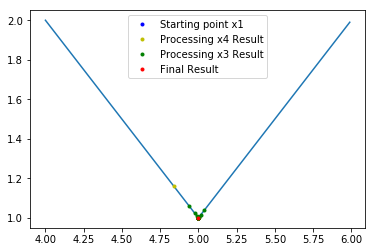

In [212]:
optimizer1D_2_with_plot(f2, x_opt2, 0.01)

When removed the function value reduction constraint:    
  
For quadratic functions, optimizer iterates more times to satisfy the interval constraint. Thus it needs more iteration, while returns results with better precision. As we can see here, the iteration times goes up from 10 to 24, and the precision goes from 1e-7 to 1e-13.  
  
While for absolute functions, there's no much difference. As we know from function reduction definition, the constraint will make optimizer stop when f value is small enough. Thus for smooth and flatten part in quadratic functions, function reduction constraint will make iterations stop before interval constraint work.   
   
Therefore, when we are dealing with minimum point in a flatten area and want better precision, we may remove the function reduction part to get better result.
  


## Code

In [158]:
"""
Required Parameters:

    function: f
    real mathmatical optimum point: (x_opt, y_opt, value_opt)
    normal distribution initialization params: mu, sigma 
    evalute time: sample_num

"""

def Evaluate_2D(func, x_opt, y_opt, value_opt, mu=0, sigma=5, sample_num=100):
    # Optimization
    xs = []
    ys = []
    values = []
    rdists_x = []
    rdists_y = []
    rdists_value = []
    runtimes = []

    for i in range(sample_num):

        xsp = x_opt + np.random.normal(mu, sigma, 1)[0]
        ysp = y_opt + np.random.normal(mu, sigma, 1)[0]

        start = time.time()
        x, y, value = optimizer2D(func, xsp, ysp, 0.01)
        end = time.time()

        runtime = (end - start) * 1000

        xs.append(x)
        ys.append(y)
        values.append(value)
        rdists_x.append(rdist(x, x_opt))
        rdists_y.append(rdist(y, y_opt))
        rdists_value.append(rdist(value, value_opt))
        runtimes.append(runtime)

    print("====== Evaluation ======\n")
    print("Evaluate %d times:\n" %(sample_num))
    print("x: %.9f +- %.9f " %analyze(xs))
    print("y: %.9f +- %.9f " %analyze(ys))
    print("values: %.9f +- %.9f " %analyze(values))
    print("\nrelative distance of x: %.9f +- %.9f " %analyze(rdists_x))
    print("relative distance of y: %.9f +- %.9f " %analyze(rdists_y))
    print("relative distance of value: %.9f +- %.9f " %analyze(rdists_value))
    print("\nruntime: %.9f +- %.9f ms" %analyze(runtimes))
    
    fig = plt.figure(figsize=(20,12))
    fig.suptitle('Box Plot on Scores', fontsize = 20)
    green_diamond = dict(markerfacecolor='g', marker='D')

    plt.subplot(2,3,1)
    plt.boxplot(xs, notch=True)
    plt.xticks([1], ['x'])

    plt.subplot(2,3,2)
    plt.boxplot(ys, notch=True)
    plt.xticks([1], ['y'])

    plt.subplot(2,3,3)
    plt.boxplot(values, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['value'])

    plt.subplot(2,3,4)
    plt.boxplot([rdists_x, rdists_y], notch=True)
    plt.xticks([1, 2], ['relative distance to optimum x','relative distance to optimum y'])

    plt.subplot(2,3,5)
    plt.boxplot(rdists_value, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['relative distance to optimum value'])

    plt.subplot(2,3,6)
    plt.boxplot(runtimes, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['runtime'])
    plt.ylabel("ms")

    plt.show()



In [45]:
def optimizer2D(f, xs, ys, step=0.01, ep_R = 1e-7, ep_abs = 1e-6):
    
    x_pred, ys, value = optimizer1D_dx(f, xs, ys, step)
    x_pred, y_pred, value = optimizer1D_dy(f, x_pred, ys, step)
    f_new = value
    f_old = value+1
    i=0
    
    while abs(f_new - f_old) > ep_R*f(x_pred, y_pred) + ep_abs:
        xs = x_pred
        ys = y_pred
        x_pred, ys, value = optimizer1D_dx(f, xs, ys, 0.01)
        x_pred, y_pred, value = optimizer1D_dy(f, x_pred, ys, 0.01)
        f_old = f_new
        f_new = value
        i+=1
#     print("Iterations: %d" %i)
    return  x_pred, y_pred, value

In [4]:
def optimizer1D_dy(f, xs, ys, step):
# optimization method used = Integrated Bracketing and Golden Section Algorithm
# ***student work goes here***
    
    # 1 Initialize
    s = 0.1
    y1 = ys
    x0 = xs
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6

    # 2 Evaluate f2
    y2 = y1 + s

    # 3 Check and invert axis
    if f(x0,y2) < f(x0,y1):
        f2 = f(x0, y1 + s)
    else:
        temp = y1
        y1 = y2
        y2 = temp
        s = -s
        f2 = f(x0, y1 + s)

    # 4 Evaluate f4 based on tau

    y2s = []
    f2s = []
    y4s = []
    f4s = []

    s = s / tau
    y4 = y2 + s
    f4 = f(x0, y4)

    y4s.append(y4)
    f4s.append(f(x0, y4))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        y1 = y2
        y2 = y4
        s = s / tau
        y4 = y2 + s
        f4 = f(x0, y4)
        y4s.append(y4)
        f4s.append(f(x0, y4))
    i = 0

    y3s = []
    f3s = []

    # do
    y3 = tau * y4 + (1 - tau) * y1
    f3 = f(x0, y3)
    y3s.append(y3)
    f3s.append(f3)

    f_new = (f(x0, y1) + f(x0, y2) + f(x0, y3))/3
    f_old = f_new+1

    while (abs(y1 - y3) > ep_R * abs(y2) + ep_abs) and (abs(f_new - f_old) > ep_R*f(x0, y2) + ep_abs):

        # 8 Loop on
        if (f2 < f3):
            y4 = y1
            y1 = y3
        else:
            y1 = y2
            y2 = y3
            f2 = f3

        # 7 Evaluate f3
        y3 = tau * y4 + (1 - tau) * y1
        f3 = f(x0, y3)
        y3s.append(y3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x0, y1) + f(x0,y2) + f(x0,y3)) / 3
        i += 1
        
    return x0, y2, f(x0,y2)

In [5]:
def optimizer1D_dx(f, xs, ys, step):
# optimization method used = Integrated Bracketing and Golden Section Algorithm
# ***student work goes here***
    
    # 1 Initialize
    s = 0.1
    x1 = xs
    y0 = ys
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6

    # 2 Evaluate f2
    x2 = x1 + s

    # 3 Check and invert axis
    if f(x2,y0) < f(x1,y0):
        f2 = f(x1 + s, y0)
    else:
        temp = x1
        x1 = x2
        x2 = temp
        s = -s
        f2 = f(x1 + s, y0)

    # 4 Evaluate f4 based on tau

    x2s = []
    f2s = []
    x4s = []
    f4s = []

    s = s / tau
    x4 = x2 + s
    f4 = f(x4, y0)

    x4s.append(x4)
    f4s.append(f(x4, y0))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        x1 = x2
        x2 = x4
        s = s / tau
        x4 = x2 + s
        f4 = f(x4, y0)
        x4s.append(x4)
        f4s.append(f(x4, y0))
    i = 0

    x3s = []
    f3s = []

    # do
    x3 = tau * x4 + (1 - tau) * x1
    f3 = f(x3, y0)
    x3s.append(x3)
    f3s.append(f3)

    f_new = (f(x1, y0) + f(x2, y0) + f(x3, y0))/3
    f_old = f_new+1

    while (abs(x1 - x3) > ep_R * abs(x2) + ep_abs) and (abs(f_new - f_old) > ep_R*f(x2, y0) + ep_abs):

        # 8 Loop on
        if (f2 < f3):
            x4 = x1
            x1 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        # 7 Evaluate f3
        x3 = tau * x4 + (1 - tau) * x1
        f3 = f(x3, y0)
        x3s.append(x3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x1, y0) + f(x2,y0) + f(x3,y0)) / 3
        i += 1
        
    return x2, y0, f(x2,y0)

In [6]:
def optimizer1D(f, xs, step):
# optimization method used = Integrated Bracketing and Golden Section Algorithm
# ***student work goes here***
    
    # 1 Initialize
    s = 0.1
    x1 = xs
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6

    # 2 Evaluate f2
    x2 = x1 + s

    # 3 Check and invert axis
    if f(x2) < f(x1):
        f2 = f(x1 + s)
    else:
        temp = x1
        x1 = x2
        x2 = temp
        s = -s
        f2 = f(x1 + s)

    # 4 Evaluate f4 based on tau

    x2s = []
    f2s = []
    x4s = []
    f4s = []

    s = s / tau
    x4 = x2 + s
    f4 = f(x4)

    x4s.append(x4)
    f4s.append(f(x4))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        x1 = x2
        x2 = x4
        s = s / tau
        x4 = x2 + s
        f4 = f(x4)
        x4s.append(x4)
        f4s.append(f(x4))
    i = 0

    x3s = []
    f3s = []

    # do
    x3 = tau * x4 + (1 - tau) * x1
    f3 = f(x3)
    x3s.append(x3)
    f3s.append(f3)

    f_new = (f(x1) + f(x2) + f(x3))/3
    f_old = f_new+1

    while (abs(x1 - x3) > ep_R * abs(x2) + ep_abs) and (abs(f_new - f_old) > ep_R*f(x2) + ep_abs):

        # 8 Loop on
        if (f2 < f3):
            x4 = x1
            x1 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        # 7 Evaluate f3
        x3 = tau * x4 + (1 - tau) * x1
        f3 = f(x3)
        x3s.append(x3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x1) + f(x2) + f(x3)) / 3
        i += 1
        
    return x2, f(x2)

In [7]:
def analyze(arr):
    """
    Calculate the Sampled averages & Estimated variance of input arr
    
    Input:
    arr: arr is an float Array with length of sample_num
    
    Output:
    
    """
    
    # sampled mean
    m = np.mean(arr)
    
    # estimated std via Bessel Correction
    n = len(arr)
    bc = sqrt(1/(n-1) * np.var(arr))
    
#     plt.errorbar(1, m, bc)
    
    return m, bc
    

In [8]:
def rdist(pred, real):
    return (abs(pred) - abs(real))/2
#     return abs(pred-real)

In [163]:
"""
Required Parameters:

    function: f
    real mathmatical optimum point: (x_opt, value_opt)
    normal distribution initialization params: mu, sigma 
    evalute time: sample_num

"""

def Evaluate_1D(func, x_opt, value_opt, mu=0, sigma=5, sample_num=100):
    # Optimization 
    xs = []
    values = []
    rdists_x = []
    rdists_value = []
    runtimes = []

    for i in range(sample_num):

        start_point = x_opt + np.random.normal(mu, sigma, 1)[0]

        start = time.time()
        x, value = optimizer1D(func, start_point, 0.01)
        end = time.time()

        runtime = (end - start) * 1000

        xs.append(x)
        values.append(value)
        rdists_x.append(rdist(x, x_opt))
        rdists_value.append(rdist(value, value_opt))
        runtimes.append(runtime)

    print("====== Evaluation ======\n")
    print("Evaluate %d times:\n" %(sample_num))
    print("x: %f +- %f " %analyze(xs))
    print("values: %f +- %f " %analyze(values))
    print("\nrelative distance of x: %f +- %f " %analyze(rdists_x))
    print("relative distance of value: %f +- %f " %analyze(rdists_value))
    print("\nruntime: %f +- %f ms" %analyze(runtimes))
    
    fig = plt.figure(figsize=(20,14))
    fig.suptitle('Box Plot on Scores', fontsize = 20)
    green_diamond = dict(markerfacecolor='g', marker='D')

    plt.subplot(2,3,1)
    plt.boxplot(xs, notch=True)
    plt.xticks([1], ['x'])

    plt.subplot(2,3,2)
    plt.boxplot(values, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['value'])

    plt.subplot(2,3,3)
    plt.boxplot(rdists_x, notch=True)
    plt.xticks([1], ['relative distance to optimum x'])

    plt.subplot(2,3,4)
    plt.boxplot(rdists_value, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['relative distance to optimum value'])

    plt.subplot(2,3,5)
    plt.boxplot(runtimes, notch=True, flierprops=green_diamond)
    plt.xticks([1], ['runtime'])
    plt.ylabel("ms")

    plt.show()

In [208]:
def optimizer1D_with_plot(f, xs, step, scope=1):
    # optimization method used = Integrated Bracketing and Golden Section Algorithm

    # 1 Initialize

    # For plotting
    a = np.arange(xs - scope, xs + scope, 0.01)
    plt.plot(a, list(map(f, a)))

    s = 0.1
    x1 = xs
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6
    plt.plot(x1, f(x1), 'b.', label='Starting point x1')

    # 2 Evaluate f2
    x2 = x1 + s

    # 3 Check and invert axis
    if f(x2) < f(x1):
        f2 = f(x1 + s)
    else:
#         print('Inverted')
        temp = x1
        x1 = x2
        x2 = temp
        s = -s
        f2 = f(x1 + s)
    # print('x1:{}\tf1:{}'.format(x1,f(x1)))
    #     print('x2:{}\tf2:{}'.format(x2,f2))
    #     print(s)

    # f2 = f(x1 + s) if f(x1 + s) < f(x1) else f(x1 - s)


    # 4 Evaluate f4 based on tau

    x2s = []
    f2s = []
    x4s = []
    f4s = []

    s = s / tau
    x4 = x2 + s
    f4 = f(x4)
#     print(s)
    #     print('x4:{}\tf4:{}'.format(x4,f4))

    x4s.append(x4)
    f4s.append(f(x4))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        x1 = x2
        x2 = x4
        s = s / tau
        x4 = x2 + s
        f4 = f(x4)
        #         print('x4:{}\tf4:{}'.format(x4,f4))
        x4s.append(x4)
        f4s.append(f(x4))
    plt.plot(x4s, f4s, 'y.', label='Processing x4 Result')
    #     plt.plot(x4s[-1], f4s[-1],'m.')
    i = 0

    x3s = []
    f3s = []

    # do
    x3 = tau * x4 + (1 - tau) * x1
    f3 = f(x3)
    x3s.append(x3)
    f3s.append(f3)

    f_new = (f(x1) + f(x2) + f(x3))/3
    f_old = f_new+1

    while (abs(x1 - x3) > ep_R * abs(x2) + ep_abs) and (abs(f_new - f_old) > ep_R*f(x2) + ep_abs):

        # print('\nx1:{}\tf1:{}'.format(x1, f(x1)))
        # print('\nx2:{}\tf2:{}'.format(x2, f(x2)))
        # print('\nx3:{}\tf3:{}'.format(x3, f(x3)))

        # 8 Loop on
        if (f2 < f3):
            x4 = x1
            x1 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        # 7 Evaluate f3
        x3 = tau * x4 + (1 - tau) * x1
        f3 = f(x3)
        x3s.append(x3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x1) + f(x2) + f(x3)) / 3
        i += 1

    print("Iterations:%d" %i)
    plt.plot(x3s, f3s, 'g.', label='Processing x3 Result')
    plt.plot(x2, f(x2), 'r.', label='Final Result')
    plt.legend()

    print('\nx:{}\tvalue:{}'.format(x1, f(x1)))
    plt.show()

In [209]:
def optimizer1D_2_with_plot(f, xs, step, scope=1):
    # optimization method used = Integrated Bracketing and Golden Section Algorithm

    # 1 Initialize

    # For plotting
    a = np.arange(xs - scope, xs + scope, 0.01)
    plt.plot(a, list(map(f, a)))

    s = 0.1
    x1 = xs
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6
    plt.plot(x1, f(x1), 'b.', label='Starting point x1')

    # 2 Evaluate f2
    x2 = x1 + s

    # 3 Check and invert axis
    if f(x2) < f(x1):
        f2 = f(x1 + s)
    else:
#         print('Inverted')
        temp = x1
        x1 = x2
        x2 = temp
        s = -s
        f2 = f(x1 + s)
    # print('x1:{}\tf1:{}'.format(x1,f(x1)))
    #     print('x2:{}\tf2:{}'.format(x2,f2))
    #     print(s)

    # f2 = f(x1 + s) if f(x1 + s) < f(x1) else f(x1 - s)


    # 4 Evaluate f4 based on tau

    x2s = []
    f2s = []
    x4s = []
    f4s = []

    s = s / tau
    x4 = x2 + s
    f4 = f(x4)
#     print(s)
    #     print('x4:{}\tf4:{}'.format(x4,f4))

    x4s.append(x4)
    f4s.append(f(x4))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        x1 = x2
        x2 = x4
        s = s / tau
        x4 = x2 + s
        f4 = f(x4)
        #         print('x4:{}\tf4:{}'.format(x4,f4))
        x4s.append(x4)
        f4s.append(f(x4))
    plt.plot(x4s, f4s, 'y.', label='Processing x4 Result')
    #     plt.plot(x4s[-1], f4s[-1],'m.')
    i = 0

    x3s = []
    f3s = []

    # do
    x3 = tau * x4 + (1 - tau) * x1
    f3 = f(x3)
    x3s.append(x3)
    f3s.append(f3)

    f_new = (f(x1) + f(x2) + f(x3))/3
    f_old = f_new+1

    while (abs(x1 - x3) > ep_R * abs(x2) + ep_abs):

        # print('\nx1:{}\tf1:{}'.format(x1, f(x1)))
        # print('\nx2:{}\tf2:{}'.format(x2, f(x2)))
        # print('\nx3:{}\tf3:{}'.format(x3, f(x3)))

        # 8 Loop on
        if (f2 < f3):
            x4 = x1
            x1 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        # 7 Evaluate f3
        x3 = tau * x4 + (1 - tau) * x1
        f3 = f(x3)
        x3s.append(x3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x1) + f(x2) + f(x3)) / 3
        i += 1

    print("Iterations:%d" %i)
    plt.plot(x3s, f3s, 'g.', label='Processing x3 Result')
    plt.plot(x2, f(x2), 'r.', label='Final Result')
    plt.legend()

    print('\nx:{}\tvalue:{}'.format(x1, f(x1)))
    plt.show()